1 Build a machine learning model to predict salary based on position for
a given dataset


## importing libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

## importing dataset

In [2]:
dataset=pd.read_csv("Position_Salaries.csv")

In [3]:
dataset.h

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
dataset.shape

(10, 3)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [6]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


## Data Preprocessing

### Checking for null values

In [7]:
dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

### checking for outlier

<AxesSubplot:>

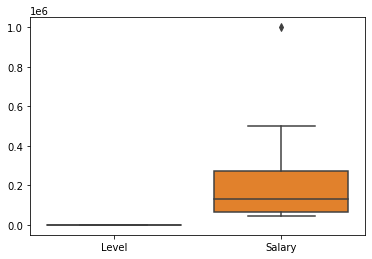

In [8]:
sns.boxplot(data=dataset)

In [9]:
dataset=dataset.drop(columns='Position')

## Feature scaling

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc=StandardScaler()
dataset=sc.fit_transform(dataset)

In [12]:
x=dataset[:,:-1]
y=dataset[:,-1]

In [13]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [14]:
y

array([-0.72004253, -0.70243757, -0.66722767, -0.59680786, -0.49117815,
       -0.35033854, -0.17428902,  0.17781001,  0.88200808,  2.64250325])

## Model building

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf=RandomForestRegressor(n_estimators=300,random_state=0)

In [26]:
rf.fit(x,y)

RandomForestRegressor(n_estimators=300, random_state=0)

In [27]:
y_pred=rf.predict(x)

In [28]:
y_pred

array([-0.70648671, -0.69921   , -0.64809696, -0.56500158, -0.50197586,
       -0.32686527, -0.20703423,  0.15140258,  1.28105365,  1.96177845])

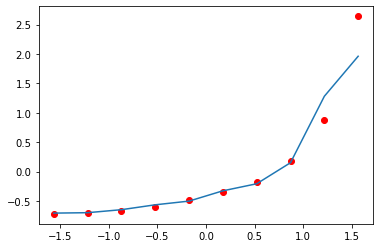

In [29]:
plt.scatter(x,y,color='red')
plt.plot(x,y_pred)

## Performace matrix

In [30]:
from sklearn.metrics import r2_score,mean_squared_error

In [31]:
R2_score=round(r2_score(y,y_pred),2)
R2_score

0.94

In [22]:
mean_square_error1=mean_squared_error(y,y_pred)
mean_square_error1

0.06300338138348553

In [34]:
filename = 'Random_forest_model.sav'
joblib.dump(rf, open(filename, 'wb'))